# Estatística com Histograma

In [1]:
import pandas as pd
import numpy as np

import statistics as stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Plot

In [2]:
x = np.random.normal(10,1,15)
len(x)

15

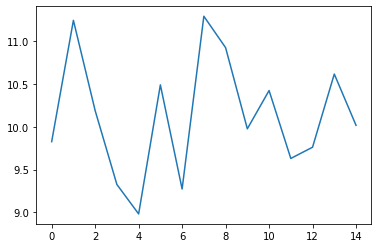

In [3]:
plt.plot(x)

### Linspace

In [4]:
x = np.linspace(0,20,1000)

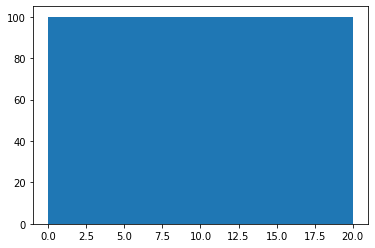

In [5]:
plt.hist(x)
plt.show()

In [6]:
y = 2*x - 5

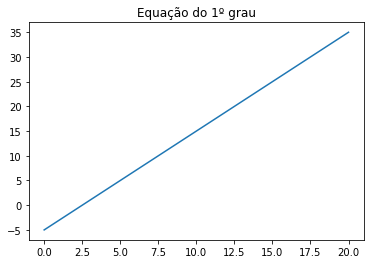

In [7]:
plt.plot(x,y)
plt.title('Equação do 1º grau')
plt.show()

In [8]:
y = 2 * x**2 - 5 * x + 3

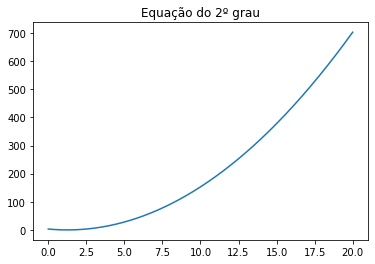

In [9]:
plt.plot(x,y)
plt.title('Equação do 2º grau')
plt.show()

In [10]:
y = 2 * x**4 + 2 * x**2 - 5 * x + 3

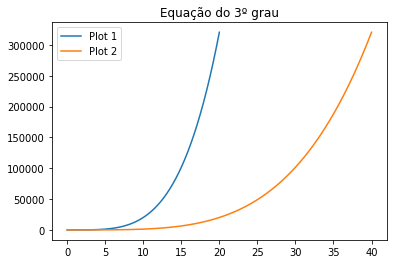

In [11]:
plt.plot(x,y, label='Plot 1')
plt.plot(x*2,y, label='Plot 2')
plt.title('Equação do 3º grau')
plt.legend()
plt.show()

### Distribuição Normal

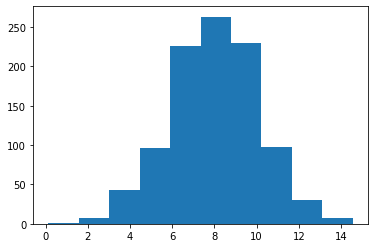

In [12]:
y = np.random.normal(8,2,1000)
plt.hist(y)
plt.show()

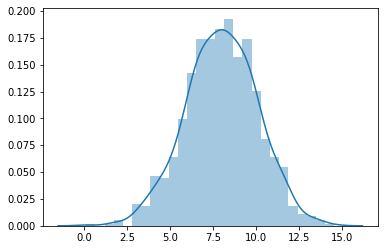

In [13]:
sns.distplot(y)
plt.show()

In [14]:
sr_km = pd.Series(np.random.randint(1,50, 300))

In [15]:
def format_percent(x:float)->str:
    return "{0:.2f}%".format(x*100)

In [16]:
def ticks_calculate(values:list, bars:int)->list:
    values.sort()
    ticks=[values[0]]
    for _ in range(bars):
        ticks.append(ticks[-1]+(values[-1]-values[0])/bars)
    return ticks # Retorna a lista com os valores dos ticks para o eixo x

In [17]:
def relative_frequency(yticks:list, total:int)->list:
    return [format_percent(tick/total) for tick in yticks] # Retorna lista de labels(str) do ytick

In [18]:
def plot_histogram(bars:int, data:pd.Series, title:str, unit:str)->plt.hist:
    ax = data.plot.hist(bins=bars, rwidth=0.95)

    ax.set_yticklabels(relative_frequency(ax.get_yticks(), len(data))) # envia lista de yticks e tamanho do lista de valores
    ax.set_xticks(ticks_calculate(data.values, bars)) # envia lista de valores e quantidade de barras

    fig = plt.gcf()
    fig.set_size_inches(10,5)
    fig.set_dpi(150)
    
    ax.set_title(title)
    ax.set_xlabel(unit)
    ax.set_ylabel('Relative Frequency')
    ax.grid(axis='y')
    plt.show()

# Frequência relativa

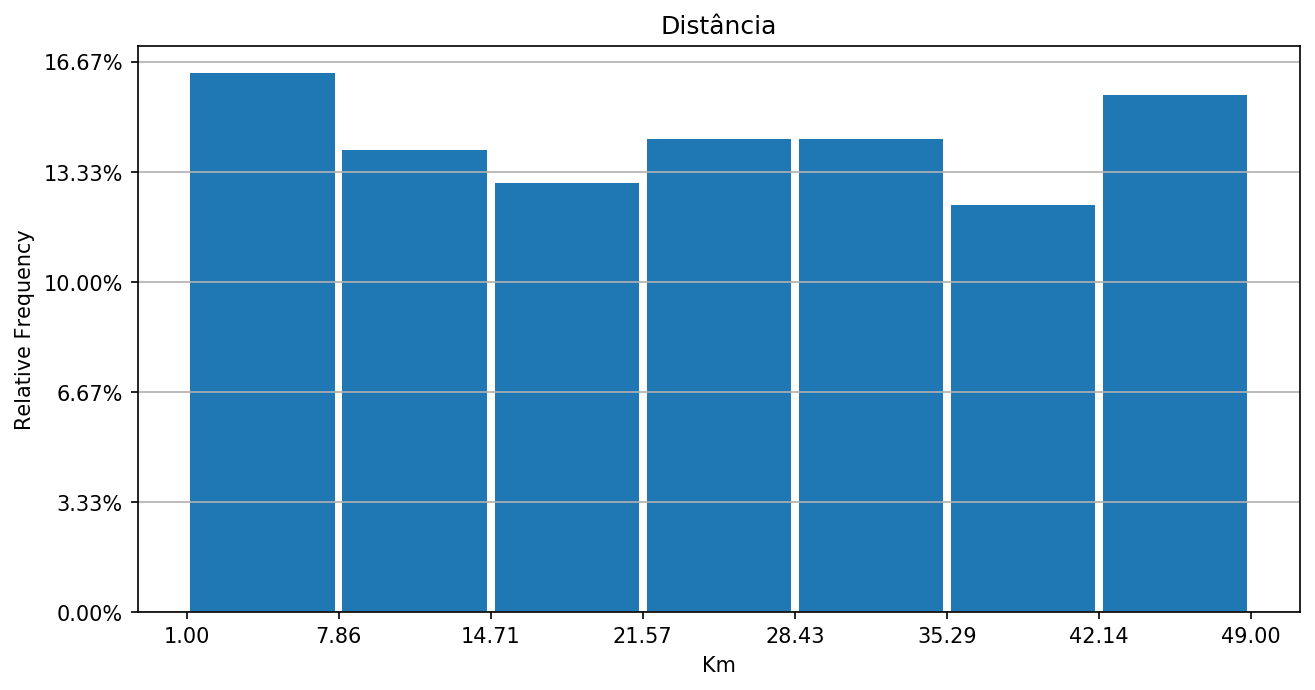

In [19]:
plot_histogram(7, sr_km, 'Distância', 'Km')

In [20]:
df = pd.read_csv('CSVs/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [21]:
df.rename({'Height':'Height_(inch)','Weight':'Weight_(pound)'}, axis=1, inplace=True)

In [22]:
df['Height_(cm)'] = (df['Height_(inch)']*2.54).round(0)
df.head()

,Gender,Height_(inch),Weight_(pound),Height_(cm)
0,Male,73.847017,241.893563,188.0
1,Male,68.781904,162.310473,175.0
2,Male,74.110105,212.740856,188.0
3,Male,71.730978,220.042470,182.0
4,Male,69.881796,206.349801,177.0


In [23]:
sr_female_height = df.loc[df['Gender']=='Female']['Height_(cm)']
sr_male_height = df.loc[df['Gender']=='Male']['Height_(cm)']

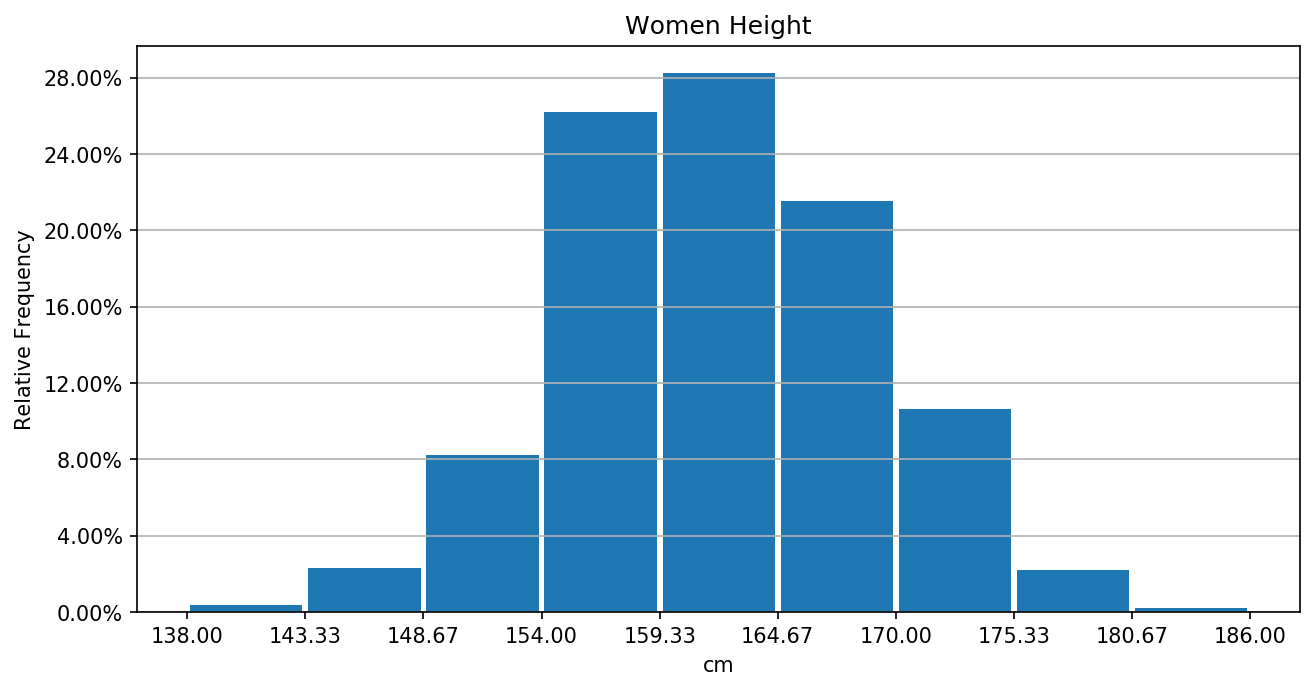

In [24]:
plot_histogram(9, sr_female_height, 'Women Height', 'cm')

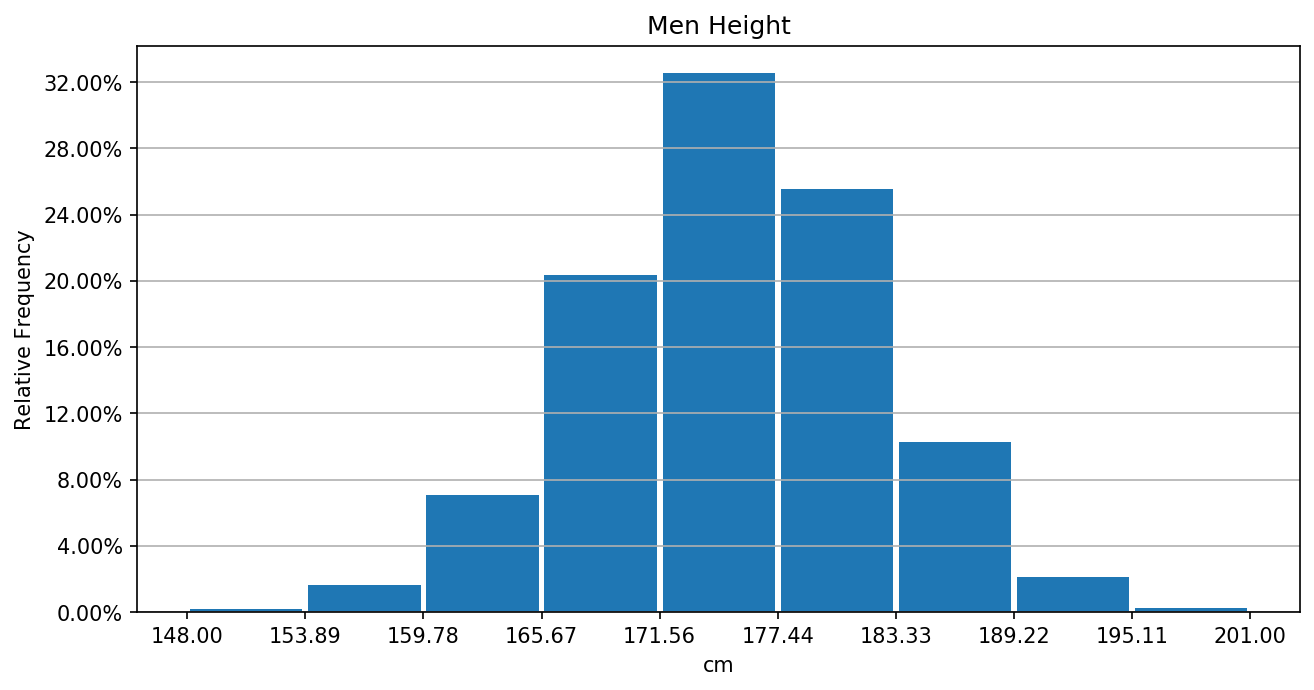

In [25]:
plot_histogram(9, sr_male_height, 'Men Height', 'cm')

In [26]:
df['Weight_(kg)']=(df['Weight_(pound)']*0.453592).round(1)
df.head()

,Gender,Height_(inch),Weight_(pound),Height_(cm),Weight_(kg)
0,Male,73.847017,241.893563,188.0,109.7
1,Male,68.781904,162.310473,175.0,73.6
2,Male,74.110105,212.740856,188.0,96.5
3,Male,71.730978,220.042470,182.0,99.8
4,Male,69.881796,206.349801,177.0,93.6


In [27]:
sr_female_weight = df.loc[df['Gender']=='Female']['Weight_(kg)']
sr_male_weight = df.loc[df['Gender']=='Male']['Weight_(kg)']

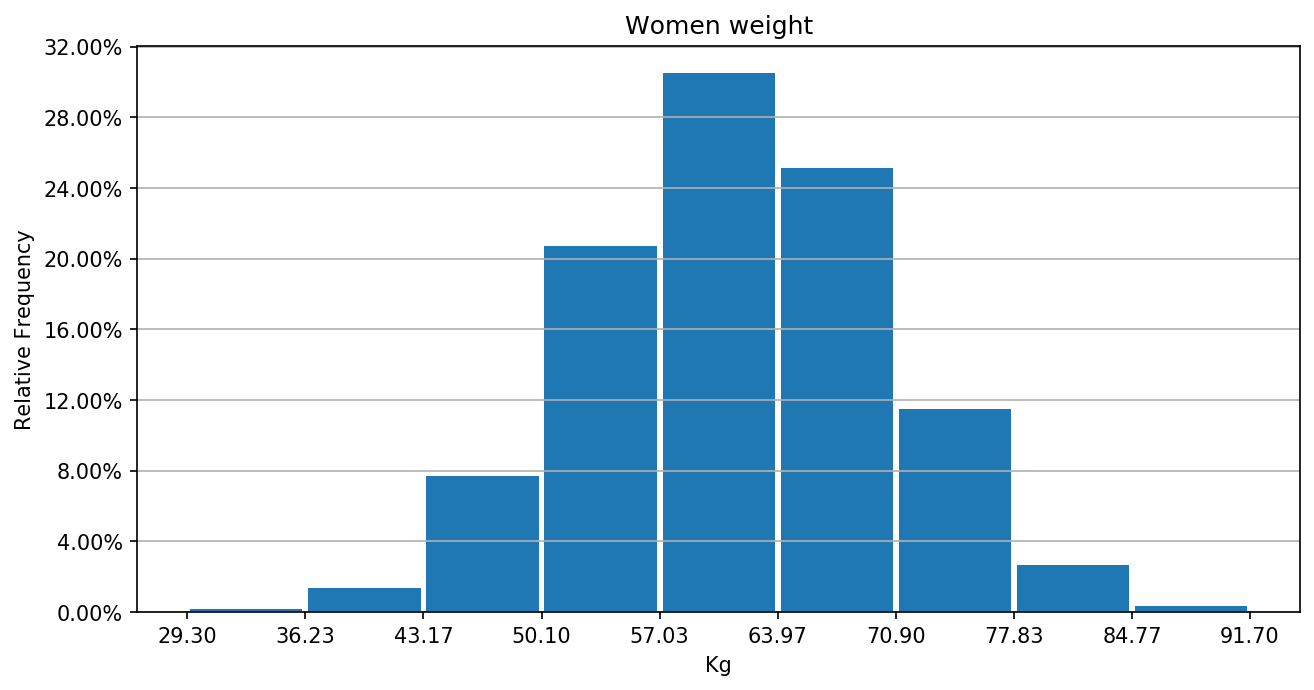

In [28]:
plot_histogram(9, sr_female_weight, 'Women weight', 'Kg')

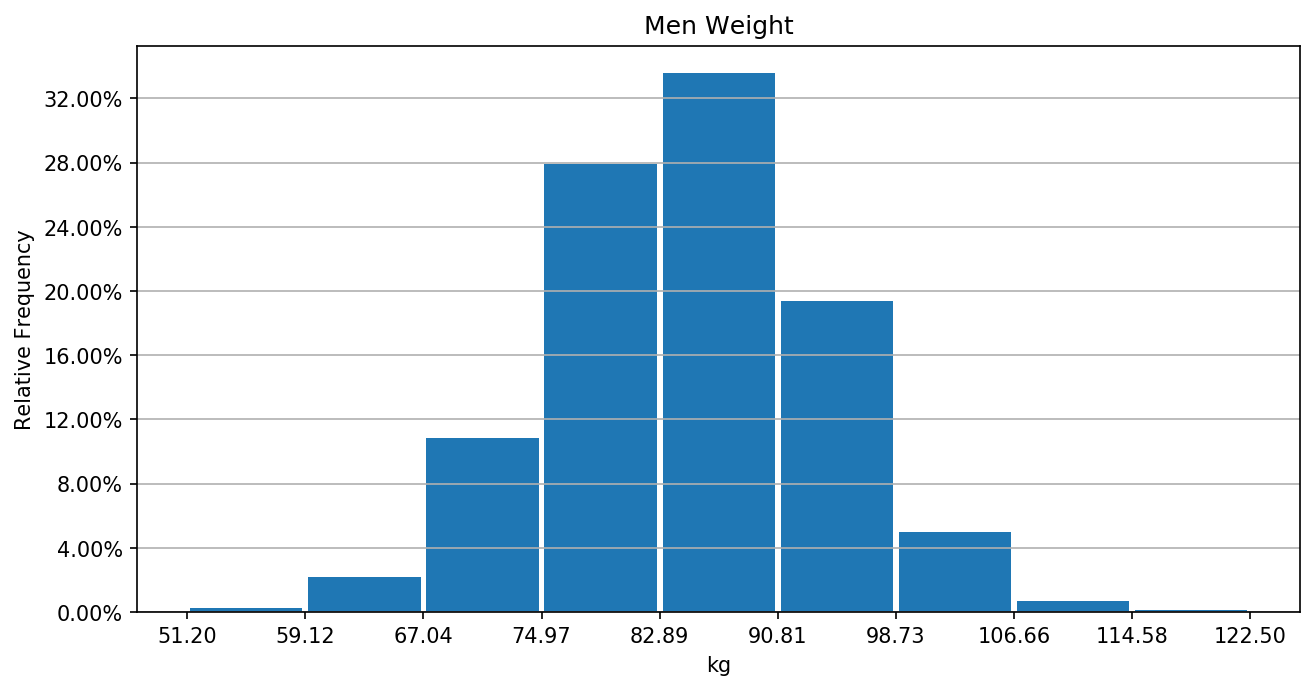

In [29]:
plot_histogram(9, sr_male_weight, 'Men Weight', 'kg')

# Média
Somatório de valores de determinados elementos dividido pela quantidade de elementos somados.

In [30]:
mean_height_female = stats.mean(sr_female_height)
mean_height_male = stats.mean(sr_male_height)

print(f'The female mean height is {mean_height_female}\n\
The male mean height is {mean_height_male}')

The female mean height is 161.8112
The male mean height is 175.327


In [31]:
mean_weight_female = stats.mean(sr_female_weight)
mean_weight_male = stats.mean(sr_male_weight)

print(f'The female mean weight is {mean_weight_female}\n\
The male mean weight is {mean_weight_male}')

The female mean weight is 61.62572
The male mean weight is 84.8308


# Mediana
Dada uma sequência de valores ordenados em ordem crescente ou decrescente, a mediana é o valor central dessa sequência. Caso haja dois valores centrais, a mediana é dada pela média aritmética deles.

In [32]:
median_height_female = stats.median(sr_female_height)
median_height_male = stats.median(sr_male_height)

print(f'The female median height is {median_height_female}\n\
The male median height is {median_height_male}')

The female median height is 162.0
The male median height is 175.0


In [33]:
median_weight_female = stats.median(sr_female_weight)
median_weight_male = stats.median(sr_male_weight)

print(f'The female median weight is {median_weight_female}\n\
The male median weight is {median_weight_male}')

The female median weight is 61.7
The male median weight is 84.8


# Moda
Dado um conjunto de valores, a moda é o número que mais se repete.

In [34]:
mode_height_female = stats.mode(sr_female_height)
mode_height_male = stats.mode(sr_male_height)

print(f'The female mode height is {mode_height_female}\n\
The male mode height is {mode_height_male}')

The female mode height is 162.0
The male mode height is 175.0


In [35]:
mode_weight_female = stats.mode(sr_female_weight)
mode_weight_male = stats.mode(sr_male_weight)

print(f'The female mode weight is {mode_weight_female}\n\
The male mode weight is {mode_weight_male}')

The female mode weight is 61.1
The male mode weight is 84.5


# Variância - População
$$\sigma^{2} = {\frac {\sum _{i=1}^{N}(x_{i}-\mu )^{2}}{N}}$$

In [36]:
pop_hgt_female = len(sr_female_height)
pop_hgt_male = len(sr_male_height)

print(f'The female height population is {pop_hgt_female}\n\
The male height population is {pop_hgt_male}')

The female height population is 5000
The male height population is 5000


In [37]:
pop_wgt_female = len(sr_female_weight)
pop_wgt_male = len(sr_male_weight)

print(f'The female weight population is {pop_wgt_female}\n\
The male weight population is {pop_wgt_male}')

The female weight population is 5000
The male weight population is 5000


In [38]:
variance_hgt_male_pop = stats.pvariance(sr_male_height)
variance_hgt_female_pop = stats.pvariance(sr_female_height)

print(f'The female height variance is {variance_hgt_female_pop}\n\
The male height variance is {variance_hgt_male_pop}')

The female height variance is 46.91595456
The male height variance is 53.086071


In [39]:
variance_wgt_male_pop = stats.pvariance(sr_male_weight)
variance_wgt_female_pop = stats.pvariance(sr_female_weight)

print(f'The female weight variance is {variance_wgt_female_pop}\n\
The male weight variance is {variance_wgt_male_pop}')

The female weight variance is 74.4430264816
The male weight variance is 80.48821936


# Variância - Amostra
$$s^{2}={\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}{n-1}}$$

In [40]:
variance_hgt_male_sample = stats.variance(sr_male_height.head(1000))
variance_hgt_female_sample = stats.variance(sr_female_height.head(1000))

print(f'The sample female height variance is {variance_hgt_female_sample}\n\
The sample male height variance is {variance_hgt_male_sample}')

The sample female height variance is 10.616052052052051
The sample male height variance is 13.200064064064064


In [41]:
variance_wgt_male_sample = stats.variance(sr_male_weight.head(1000))
variance_wgt_female_sample = stats.variance(sr_female_weight.head(1000))

print(f'The sample female weight variance is {variance_wgt_female_sample}\n\
The sample male weight variance is {variance_wgt_male_sample}')

The sample female weight variance is 15.545032782782783
The sample male weight variance is 18.605533843843844


# Desvio Padrão - População
$$\sqrt{\sigma^{2}}=\sigma$$

In [42]:
std_deviation_hgt_male_pop = stats.pstdev(sr_male_height)
std_deviation_hgt_female_pop = stats.pstdev(sr_female_height)

print(f'The population female height standard deviation is {std_deviation_hgt_female_pop}\n\
The population male height standard deviation is {std_deviation_hgt_male_pop}')

The population female height standard deviation is 6.8495222139942
The population male height standard deviation is 7.286018871784508


In [43]:
std_deviation_wgt_male_pop = stats.pstdev(sr_male_weight)
std_deviation_wgt_female_pop = stats.pstdev(sr_female_weight)

print(f'The population female weight standard deviation is {std_deviation_wgt_female_pop}\n\
The population male weight standard deviation is {std_deviation_wgt_male_pop}')

The population female weight standard deviation is 8.628037232279425
The population male weight standard deviation is 8.971522689042256


# Desvio Padrão - Amostra
$$\sqrt{S^{2}}=S$$

In [44]:
std_deviation_hgt_male_sample = stats.stdev(sr_male_height.head(1000))
std_deviation_hgt_female_sample = stats.stdev(sr_female_height.head(1000))

print(f'The sample female height standard deviation is {std_deviation_hgt_female_sample}\n\
The sample male height standard deviation is {std_deviation_hgt_male_sample}')

The sample female height standard deviation is 3.258228360942807
The sample male height standard deviation is 3.63318924143294


In [45]:
std_deviation_wgt_male_sample = stats.stdev(sr_male_weight.head(1000))
std_deviation_wgt_female_sample = stats.stdev(sr_female_weight.head(1000))

print(f'The sample female height standard deviation is {std_deviation_wgt_female_sample}\n\
The sample male height standard deviation is {std_deviation_wgt_male_sample}')

The sample female height standard deviation is 3.942718958128107
The sample male height standard deviation is 4.313413247515689


# Coeficiente de Variação - População
$$CV = {\frac \sigma {\mu}}$$

In [46]:
coef_hgt_female_pop = format_percent(std_deviation_hgt_female_pop/mean_height_female)
coef_hgt_male_pop = format_percent(std_deviation_hgt_male_pop/mean_height_male)

print(f'The coefficient of variation of height female population is {coef_hgt_female_pop}\n\
The coefficient of variation of height male population is {coef_hgt_male_pop}')

The coefficient of variation of height female population is 4.23%
The coefficient of variation of height male population is 4.16%


In [47]:
coef_wgt_female_pop = format_percent(std_deviation_wgt_female_pop/mean_weight_female)
coef_wgt_male_pop = format_percent(std_deviation_wgt_male_pop/mean_weight_male)

print(f'The coefficient of variation of weight female population is {coef_wgt_female_pop}\n\
The coefficient of variation of weight male population is {coef_wgt_male_pop}')

The coefficient of variation of weight female population is 14.00%
The coefficient of variation of weight male population is 10.58%


# Coeficiente de Variação - Amostra
$$CV = {\frac S {\overline {x}}}$$

In [48]:
coef_hgt_female_sample = format_percent(std_deviation_hgt_female_sample/stats.mean(sr_female_height.head(1000)))
coef_hgt_male_sample = format_percent(std_deviation_hgt_male_sample/stats.mean(sr_male_height.head(1000)))

print(f'The coefficient of variation of height female sample is {coef_hgt_female_sample}\n\
The coefficient of variation of height male sample is {coef_hgt_male_sample}')

The coefficient of variation of height female sample is 2.14%
The coefficient of variation of height male sample is 2.20%


In [49]:
coef_wgt_female_sample = format_percent(std_deviation_wgt_female_sample/stats.mean(sr_female_weight.head(1000)))
coef_wgt_male_sample = format_percent(std_deviation_wgt_male_sample/stats.mean(sr_male_weight.head(1000)))

print(f'The coefficient of variation of weight female sample is {coef_wgt_female_sample}\n\
The coefficient of variation of weight male sample is {coef_wgt_male_sample}')

The coefficient of variation of weight female sample is 7.97%
The coefficient of variation of weight male sample is 5.97%


In [50]:
dct_cv_pop = {'Men':{'cv_pop_height':coef_hgt_male_pop,'cv_pop_weight':coef_wgt_male_pop},
         'Women':{'cv_pop_height':coef_hgt_female_pop,'cv_pop_weight':coef_wgt_female_pop}}
df_cv_pop = pd.DataFrame.from_dict(dct_cv_pop)
df_cv_pop

,Men,Women
cv_pop_height,4.16%,4.23%
cv_pop_weight,10.58%,14.00%


In [51]:
dct_cv_sample = {'Men':{'cv_sample_height':coef_hgt_male_sample,'cv_sample_weight':coef_wgt_male_sample},
         'Women':{'cv_sample_height':coef_hgt_female_sample,'cv_sample_weight':coef_wgt_female_sample}}
df_cv_sample = pd.DataFrame.from_dict(dct_cv_sample)
df_cv_sample

,Men,Women
cv_sample_height,2.20%,2.14%
cv_sample_weight,5.97%,7.97%


# Covariância - População
$$Cov(x,y)={\frac {\sum _{i=1}^{N}(x_{i}-{\mu_{x}})*(y_{i}-{\mu_{y}})}{N}}$$

# Covariância - Amostra
$$Cov(x,y)={\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})*(y_{i}-{\overline {y}})}{n-1}}$$

### Exemplo: Covariância - amostra com 5 indivíduos

In [52]:
top_five = df[['Height_(cm)','Weight_(kg)']].head(5)
top_five

,Height_(cm),Weight_(kg)
0,188.0,109.7
1,175.0,73.6
2,188.0,96.5
3,182.0,99.8
4,177.0,93.6


$$(x = Height, y = Weight)$$

In [53]:
def cov_calculate(x:float, y:float, p:int)->float:
    return (x[p]-x.mean())*(y[p]-y.mean())

In [54]:
def population_cov(x:str, y:str, pop:pd.DataFrame)->float:
    return sum([cov_calculate(pop[x],pop[y], i) for i in range(len(pop))])/(len(pop))

In [55]:
def sample_cov(x:str, y:str, sample:pd.DataFrame)->float:
    return sum([cov_calculate(sample[x],sample[y], i) for i in range(len(sample))])/(len(sample)-1)

In [56]:
sample_cov('Height_(cm)', 'Weight_(kg)', top_five)

63.50000000000002

In [57]:
population_cov('Height_(cm)', 'Weight_(kg)', df[['Height_(cm)','Weight_(kg)']])

131.68298723400034

# Coeficiente de Correlação
$${\frac {Cov(x,y)}{Stdev(x)*Stdev(y)}}$$

In [58]:
corr_coef_top_five = format_percent(sample_cov('Height_(cm)', 'Weight_(kg)', top_five)/\
(stats.stdev( top_five['Height_(cm)'] ) * stats.stdev( top_five['Weight_(kg)'] ) ))
corr_coef_top_five

'79.42%'

In [59]:
top_five.corr()

,Height_(cm),Weight_(kg)
Height_(cm),1.000000,0.794157
Weight_(kg),0.794157,1.000000


In [60]:
corr_coef = format_percent(population_cov('Height_(cm)', 'Weight_(kg)', df)/\
( stats.stdev( df['Height_(cm)'] ) * stats.stdev( df['Weight_(kg)'] ) ))
corr_coef

'92.44%'

In [61]:
df[['Height_(cm)','Weight_(kg)']].corr()

,Height_(cm),Weight_(kg)
Height_(cm),1.000000,0.924457
Weight_(kg),0.924457,1.000000


In [62]:
def calculate_coef(x1:str, y:str, df:pd.DataFrame)->list: # 0=coef, 1=x1
    return sm.OLS(df[y], sm.add_constant(df[x1])).fit().params

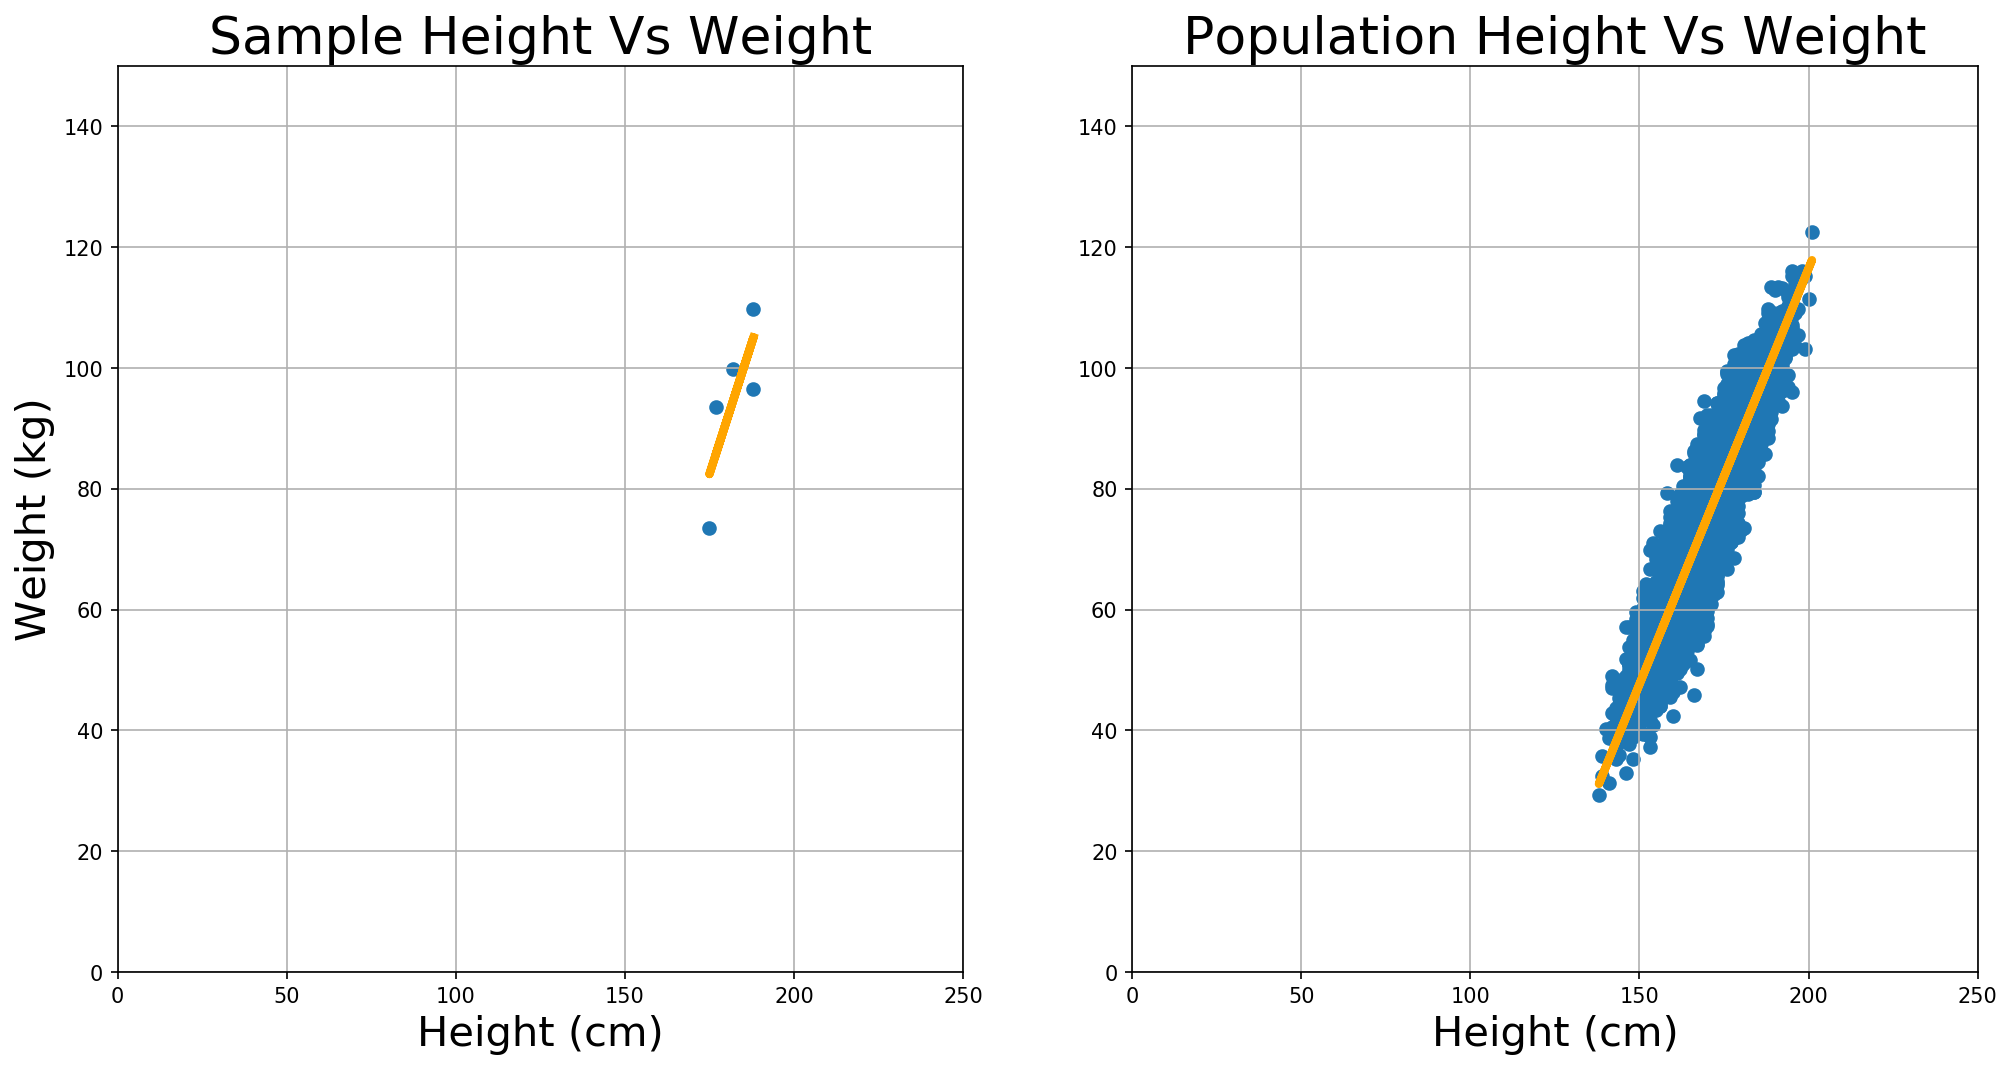

In [63]:
coef, x1 = calculate_coef('Height_(cm)','Weight_(kg)',top_five)
yhat = x1*top_five['Height_(cm)']+coef

plt.figure(figsize=(16,8), dpi=150)

ax = plt.subplot(1,2,1)
ax.scatter(top_five['Height_(cm)'],top_five['Weight_(kg)'])
ax.plot(top_five['Height_(cm)'],
         yhat, lw=4, c='orange', label='Regression Line')
ax.set_ylim(0,150)
ax.set_xlim(0,250)
ax.set_xlabel('Height (cm)', fontsize=20)
ax.set_ylabel('Weight (kg)', fontsize=20)
ax.set_title('Sample Height Vs Weight', fontsize=25)
ax.grid(True)

coef, x1 = calculate_coef('Height_(cm)','Weight_(kg)',df)
yhat = x1*df['Height_(cm)']+coef

ax = plt.subplot(1,2,2)
ax.scatter(df['Height_(cm)'],df['Weight_(kg)'])
ax.plot(df['Height_(cm)'],
         yhat, lw=4, c='orange', label='Regression Line')
ax.set_ylim(0,150)
ax.set_xlim(0,250)
ax.set_xlabel('Height (cm)', fontsize=20)
ax.set_title('Population Height Vs Weight', fontsize=25)
ax.grid(True)

plt.show()

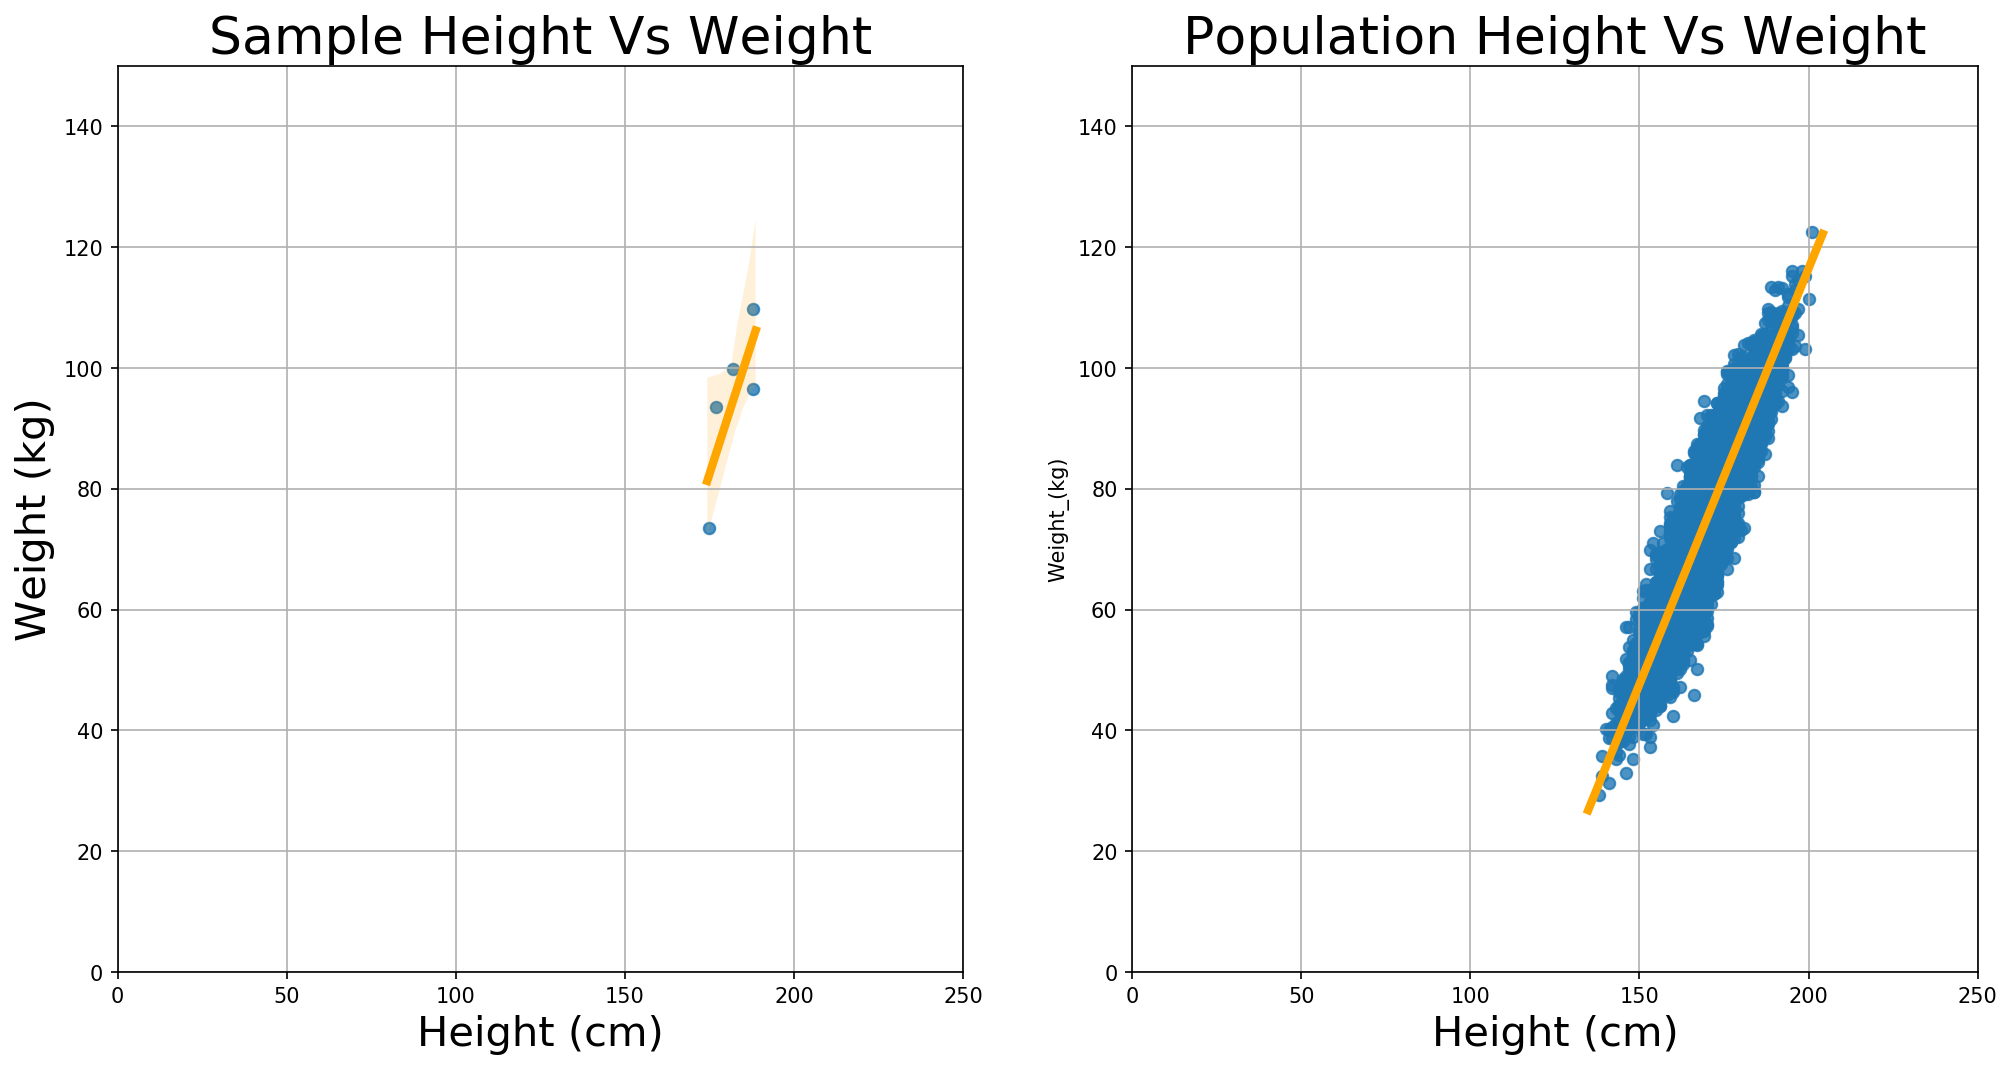

In [64]:
plt.figure(figsize=(16,8), dpi=150)

plt.subplot(1,2,1)
ax = sns.regplot(x='Height_(cm)', y='Weight_(kg)', data=top_five,
                 truncate=False, scatter_kws={"s": 30},
                line_kws={"lw":4, "color":'orange'})
ax.set_ylim(0,150)
ax.set_xlim(0,250)
ax.set_xlabel('Height (cm)', fontsize=20)
ax.set_ylabel('Weight (kg)', fontsize=20)
ax.set_title('Sample Height Vs Weight', fontsize=25)
ax.grid(True)

plt.subplot(1,2,2)
ax = sns.regplot(x='Height_(cm)', y='Weight_(kg)', data=df,
                 truncate=False, scatter_kws={"s": 30},
                line_kws={"lw":4, "color":'orange'})
ax.set_ylim(0,150)
ax.set_xlim(0,250)
ax.set_xlabel('Height (cm)', fontsize=20)
ax.set_title('Population Height Vs Weight', fontsize=25)
ax.grid(True)

plt.show()

In [65]:
female = df.loc[df['Gender']=='Female'][['Height_(cm)','Weight_(kg)']]
female.corr()

,Height_(cm),Weight_(kg)
Height_(cm),1.00000,0.84897
Weight_(kg),0.84897,1.00000


In [66]:
male = df.loc[df['Gender']=='Male'][['Height_(cm)','Weight_(kg)']]
male.corr()

,Height_(cm),Weight_(kg)
Height_(cm),1.000000,0.862458
Weight_(kg),0.862458,1.000000


In [67]:
def plot_regression(title:str, x:str, y:str, df:pd.DataFrame)->sns.regplot:
    
    ax = sns.regplot(x=x, y=y, data=df,
                 truncate=False, scatter_kws={"s": 30},
                line_kws={"lw":2, "color":'orange'})
    ax.set_xlabel(x, fontsize=10)
    ax.set_xlabel(x, fontsize=10)
    ax.set_title(f'{title}\n {x} Vs {y}', fontsize=15)
    ax.grid(True)
    
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    fig.set_dpi(150)

    return ax

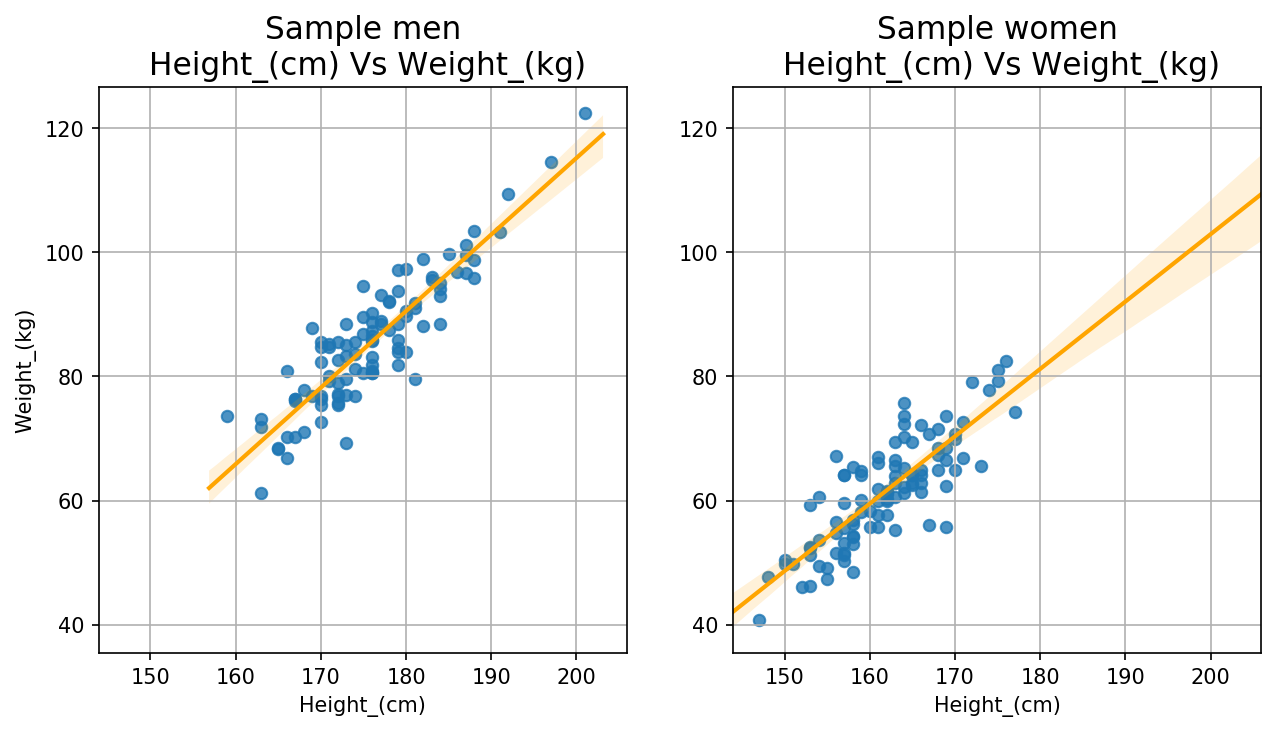

In [68]:
plt.subplot(1,2,1)
ax = plot_regression('Sample men', 'Height_(cm)','Weight_(kg)', male[2000:2100])
plt.subplot(1,2,2, sharey=ax, sharex=ax)
ax = plot_regression('Sample women', 'Height_(cm)','Weight_(kg)', female[2000:2100])
ax.set_ylabel('')
plt.show()